In [750]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage


In [751]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Basic Data Analyses

In [752]:
df.shape

(8950, 18)

In [753]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [754]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [755]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analyses - EDA

In [756]:
df.drop('CUST_ID', axis=1, inplace=True)

In [757]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [758]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [759]:
skew_values = df.skew()
print(skew_values)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64


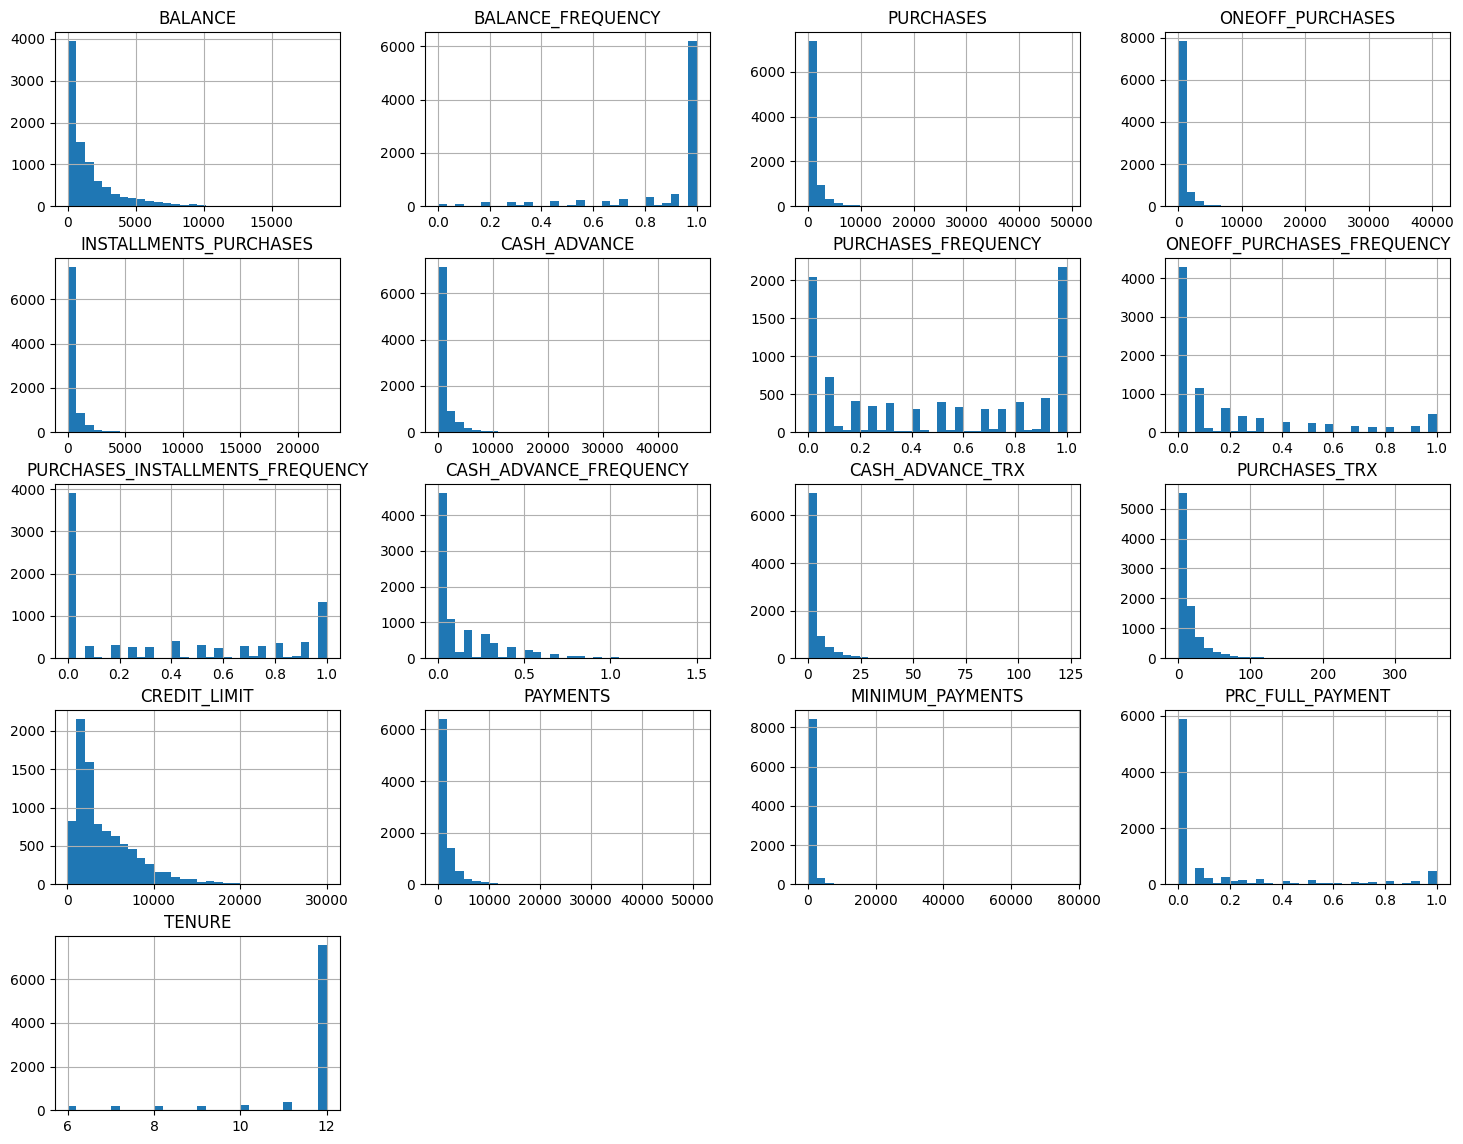

In [760]:
num_cols = df.select_dtypes(include='number').columns

df[num_cols].hist(figsize=(18,14), bins=30)
plt.show()

In [761]:
cols_to_transform = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for col in cols_to_transform:
    df[col] = np.log1p(df[col])

print("Skewness after log transformation:")
print(df[cols_to_transform].skew())

Skewness after log transformation:
BALANCE                      -0.861021
PURCHASES                    -0.764492
ONEOFF_PURCHASES              0.185854
INSTALLMENTS_PURCHASES       -0.024981
CASH_ADVANCE                  0.262594
CASH_ADVANCE_TRX              0.940131
PURCHASES_TRX                 0.032697
PAYMENTS                     -1.778312
MINIMUM_PAYMENTS              0.269703
CREDIT_LIMIT                 -0.101408
ONEOFF_PURCHASES_FREQUENCY    1.290617
CASH_ADVANCE_FREQUENCY        1.455462
PRC_FULL_PAYMENT              1.746046
dtype: float64


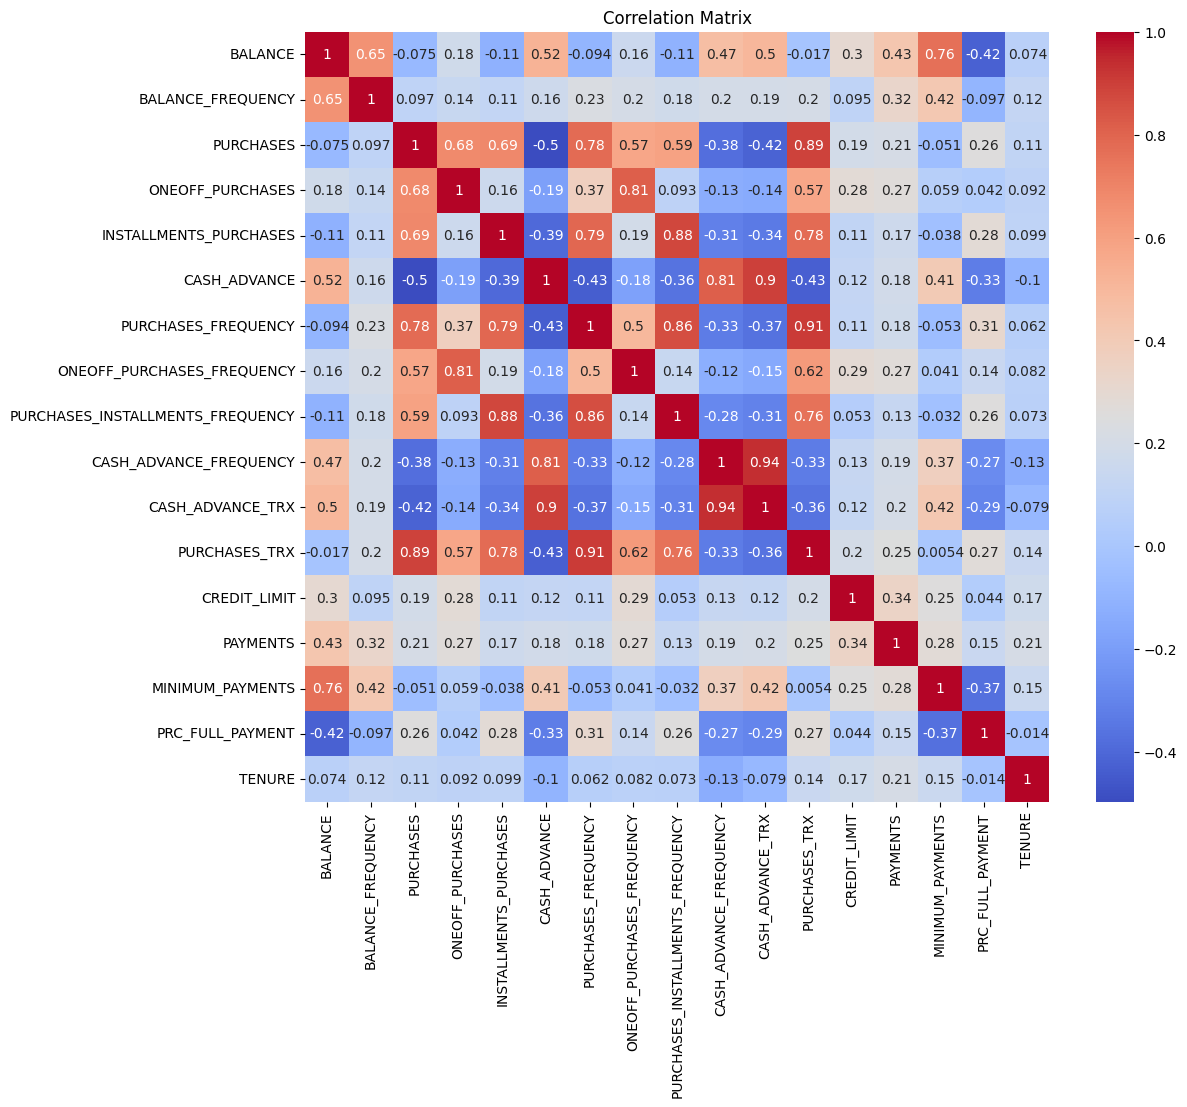

In [762]:
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [763]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

BALANCE: 132 outliers
BALANCE_FREQUENCY: 1493 outliers
PURCHASES: 0 outliers
ONEOFF_PURCHASES: 0 outliers
INSTALLMENTS_PURCHASES: 0 outliers
CASH_ADVANCE: 0 outliers
PURCHASES_FREQUENCY: 0 outliers
ONEOFF_PURCHASES_FREQUENCY: 481 outliers
PURCHASES_INSTALLMENTS_FREQUENCY: 0 outliers
CASH_ADVANCE_FREQUENCY: 337 outliers
CASH_ADVANCE_TRX: 15 outliers
PURCHASES_TRX: 0 outliers
CREDIT_LIMIT: 6 outliers
PAYMENTS: 318 outliers
MINIMUM_PAYMENTS: 169 outliers
PRC_FULL_PAYMENT: 1429 outliers
TENURE: 1366 outliers


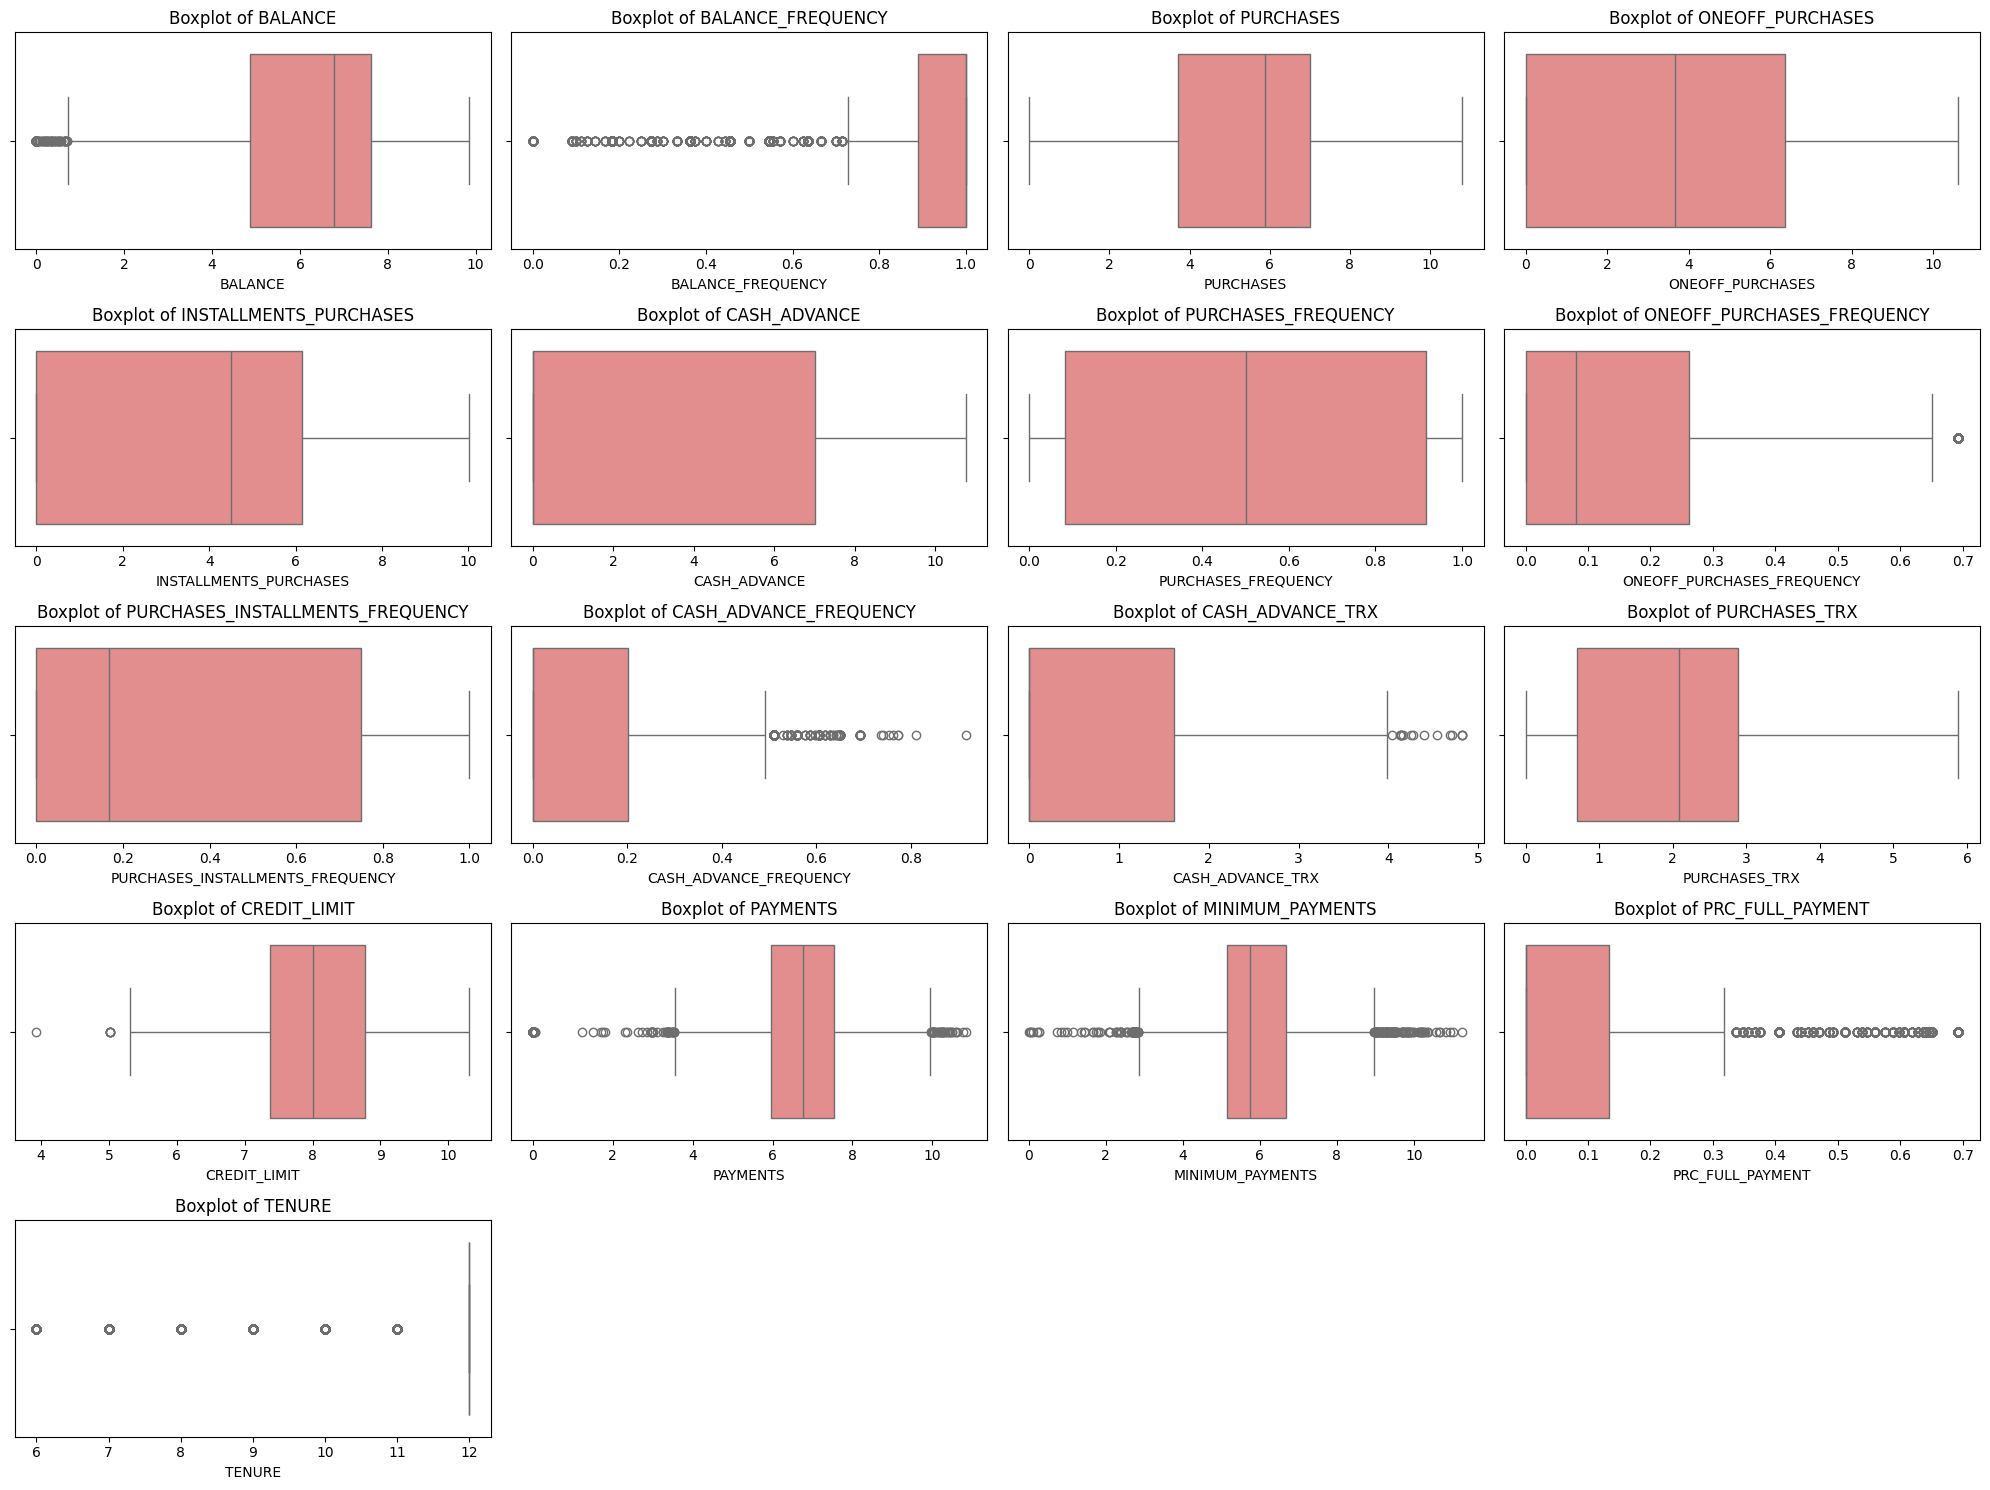

In [764]:
plt.figure(figsize=(20,15))
for i, col in enumerate(df.columns):
    plt.subplot(5,4,i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [765]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

In [766]:
for col in df.columns:
    if df[col].dtype != 'object':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"{col}: {outliers} outliers")

BALANCE: 0 outliers
BALANCE_FREQUENCY: 0 outliers
PURCHASES: 0 outliers
ONEOFF_PURCHASES: 0 outliers
INSTALLMENTS_PURCHASES: 0 outliers
CASH_ADVANCE: 0 outliers
PURCHASES_FREQUENCY: 0 outliers
ONEOFF_PURCHASES_FREQUENCY: 0 outliers
PURCHASES_INSTALLMENTS_FREQUENCY: 0 outliers
CASH_ADVANCE_FREQUENCY: 0 outliers
CASH_ADVANCE_TRX: 0 outliers
PURCHASES_TRX: 0 outliers
CREDIT_LIMIT: 0 outliers
PAYMENTS: 0 outliers
MINIMUM_PAYMENTS: 0 outliers
PRC_FULL_PAYMENT: 0 outliers
TENURE: 0 outliers


Scaling

In [767]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [768]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.2f}")

Explained variance ratio: 0.60


KMeans Clustering

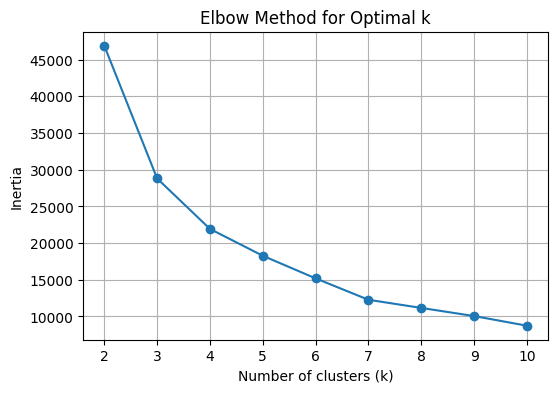

In [769]:
# Elbow Method to find optimal k

inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [770]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

In [771]:
sil_kmeans = silhouette_score(X_pca, kmeans_labels)
print(f"KMeans Silhouette Score: {sil_kmeans:.4f}")

KMeans Silhouette Score: 0.4247


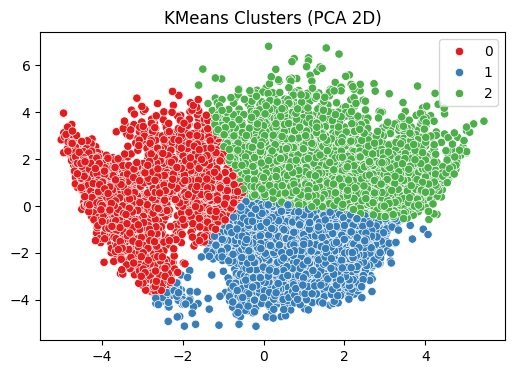

In [772]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette="Set1")
plt.title("KMeans Clusters (PCA 2D)")
plt.show()

Hierarchical Clustering

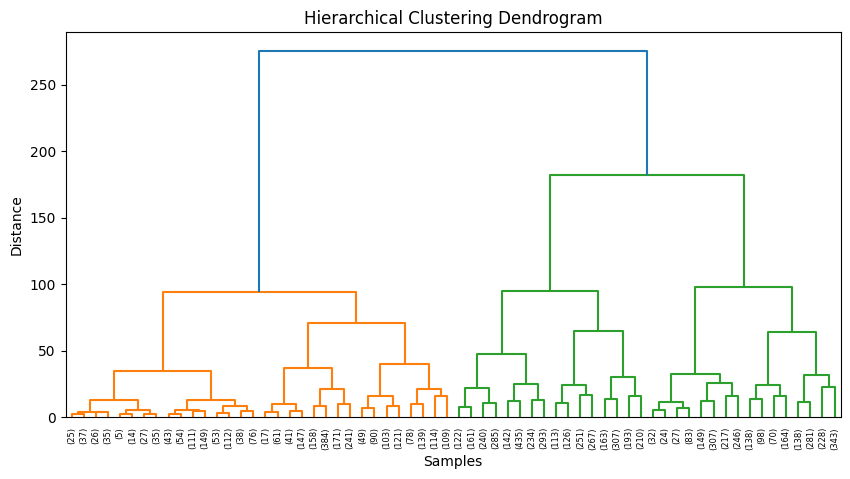

In [773]:
linked = linkage(X_pca, method='ward')
plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [774]:
hier = AgglomerativeClustering(n_clusters=k, linkage='ward')
hier_labels = hier.fit_predict(X_pca)

In [775]:
sil_hier = silhouette_score(X_pca, hier_labels)
print(f"Hierarchical Clustering Silhouette Score: {sil_hier:.4f}")

Hierarchical Clustering Silhouette Score: 0.3846


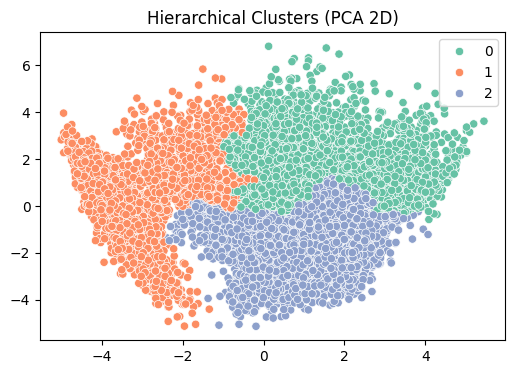

In [776]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=hier_labels, palette="Set2")
plt.title("Hierarchical Clusters (PCA 2D)")
plt.show()

DBSCAN Clustering

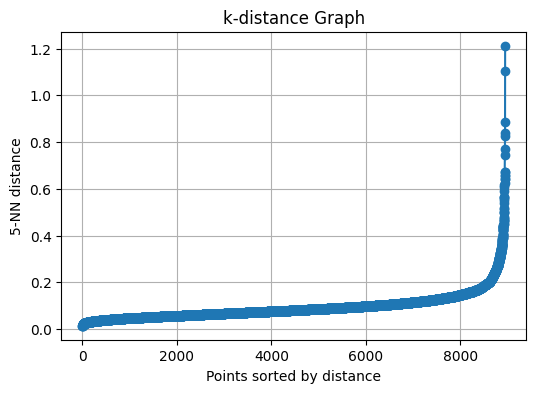

In [777]:
# Find optimal epsilon using k-NN distance

neighbors = 5
nbrs = NearestNeighbors(n_neighbors=neighbors)
nbrs_fit = nbrs.fit(X_pca)
distances, indices = nbrs_fit.kneighbors(X_pca)
distances = np.sort(distances[:, neighbors - 1])
plt.figure(figsize=(6,4))
plt.plot(distances, marker='o')
plt.title("k-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{neighbors}-NN distance")
plt.grid(True)
plt.show()

In [778]:
dbscan = DBSCAN(eps=0.2, min_samples=4)
db_labels = dbscan.fit_predict(X_pca) 

In [779]:
n_clusters = len(set(db_labels)) - (1 if -1 in db_labels else 0)
noise_frac = (db_labels == -1).sum() / len(db_labels)
if n_clusters > 1:
    sil_score = silhouette_score(X_pca, db_labels)
else:
    sil_score = None

In [780]:
print(f"DBSCAN clusters: {n_clusters}")
print(f"Noise fraction: {noise_frac:.2f}")
print(f"Silhouette score: {sil_score}")

DBSCAN clusters: 9
Noise fraction: 0.02
Silhouette score: -0.22518140892948282


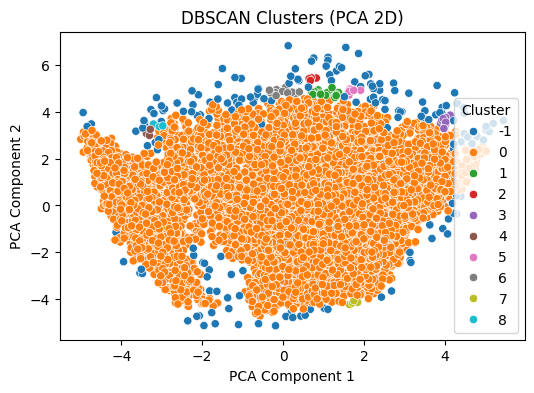

In [781]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_labels, palette="tab10")
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()